In [79]:
### GTA
%matplotlib inline
import random
import numpy.random as npr
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from math import *

plt.rcParams["figure.figsize"] = (20,10)

In [80]:
#cap = capital initial = c
#temps = temps de la simulation = t
#rec = recettes versees par les clients  = p
#mu = mu de la loi expo des sinistres
#n = nombre de sinistres

def R_v0(cap, temps, rec, mu, lam):
    R = []
    R.append(cap)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi

    Abs = []
    Abs.append(0) #le temps commence a 0
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    
    

    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(1/lam,1))
        R.append(R[indice] + rec*(T[i]-T[i-1]))
        R.append(R[indice+1] - X[i])
        Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
        Abs.append(T[i])
        
        i = i + 1
        indice = indice + 2
        
    Abs.append(T[i])
    R.append(R[indice] + rec*(T[i]-T[i-1]))
    
    plt.plot(Abs,R)
    plt.xlabel("Temps", fontsize = 24)
    plt.ylabel("Capital", fontsize = 24)
    plt.title("Evolution du capital en fonction du temps", fontsize = 24)
    plt.legend("Cap")
    plt.show()
    

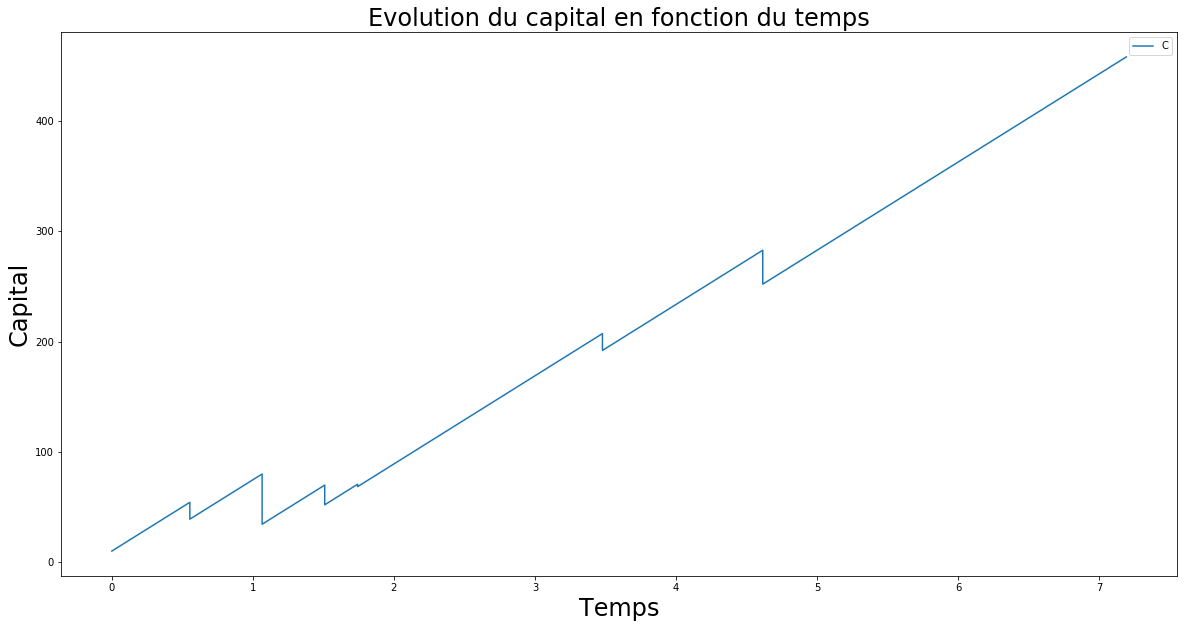

In [81]:
R_v0(10,5,80,1,0.03)
#R_v0(10,5,80,1,1)

Cette fonction permet d'obtenir le capital au temps "temps". On commence par initialiser quatre tableaux.
R correspond au capital.
T correspond aux instants des sinistres.
X correspond aux couts des sinistres.
Abs est le tableaux des abscisses permettant de contruire le graphique. 

Tout d'abord, on initialise les tableaux. 
i est l'entier permettant d'accéder aux éléments des tableaux X et T. 
indice permet d'accéder aux éléments de R, à chaque tour de boucle, indice augmente de 2 unités car pour chaque sinistre, il y a deux valeurs du capital, et il faut repartir de la bonne.

La boucle while permet de similuer l'arrivée des sinistres. 
A chaque sinistre, on construit le point précédent la perte d'argent, puis, on retire le coup du sinistre au capital. On ajoute aussi à Abs, le moment où le sinistre a eu lieu pour pouvoir par la suite tracer le graphique. 

Quand on sort de la boucle, cela veut dire que le dernier sinistre a lieu après le temps paramétré. Ainsi, on ajoute cette fois-ci seulement la valeur du capital, sans enlever le coup du sinistre ( car il n'a pas encore eu lieu). 

Finalement, on trace le graphique représentant le capital en fonction du temps. 

In [84]:
#cap = capital initial = c
#temps = temps de la simulation = t
#rec = recettes versees par les clients  = p
#mu = mu de la loi expo des sinistres
#n = nombre de sinistres

def R_cap(cap, temps, rec, mu, lam):
    R = []
    R.append(cap)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi
    
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    
    

    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        #t = expovariate(mu)
        t = npr.exponential(mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(1/lam))
        R.append(R[indice] + rec*(T[i]-T[i-1]))
        R.append(R[indice+1] - X[i])
        
        if(R[indice + 1] < 0 ):
            return (1/lam,-1)
            
        i = i + 1
        indice = indice + 2
    
    R.append(R[indice] + rec*(T[i]-T[i-1]))
    
    return(1/lam,1)

In [85]:
R_cap(10,5,80,1,30) 

(0.03333333333333333, 1)

In [83]:
def ruine(n,cap, temps, rec, mu,lam):
    Reu = [] #Tableau des reussites 
    Fail = [] #Tableau des ruines
    
    for i in range(n):
        x = R_cap(cap, temps, rec, mu,lam)
        if(x[1] == 1):
            Reu.append(x)
        else :
            Fail.append(x)
    
    return[len(Reu),len(Fail),mu,lam]

[1000, 0, 1, 100]

In [86]:
ruine(1000,10,5,80,1,100)

[1000, 0, 1, 100]

_________________________________________________________________________________________________________________________

# Question 1

In [75]:
def bon(temps, mu, lam,n):
    R = []
    R.append(0)
    delta = []
    T = [] #Tableau des Ti
    X = [] #Tableau des Xi
    Abs = []
    Abs.append(0) #le temps commence a 0
    T.append(0)
    X.append(0)
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    while T[i] < temps :
       t= npr.exponential(mu,1)
       T.append(somme + t)
        
       somme = somme + t
       X.append(npr.exponential(lam,1))
       R.append(R[indice])
       R.append(R[indice+1] + X[i])
       Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
       Abs.append(T[i])
        
       indice = indice + 2
       i = i + 1 
    Abs.append(T[i])
    R.append(R[indice])             
    
    plt.plot(Abs,R)
    plt.xlabel("Temps", fontsize = 24)
    plt.ylabel("Capital", fontsize = 24)
    plt.title("Somme des Xt A MODIFIER", fontsize = 24)
    plt.legend("Ct")
    plt.show()
    

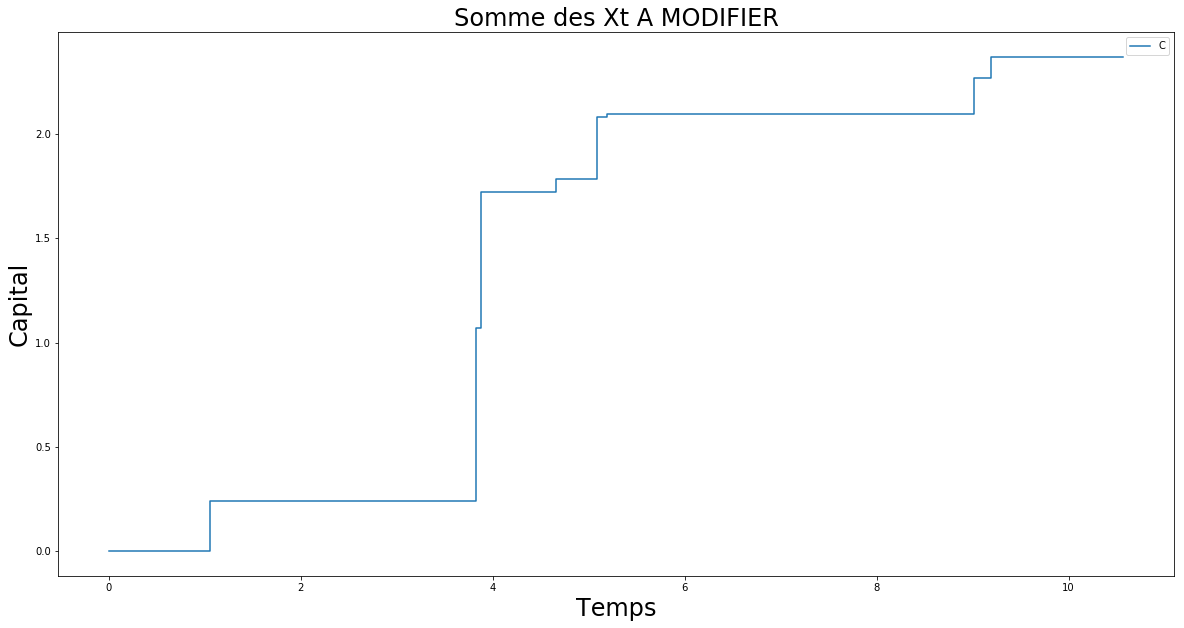

In [76]:
bon(10,1,0.5,10)

/usr/lib/python3/dist-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in double_scalars


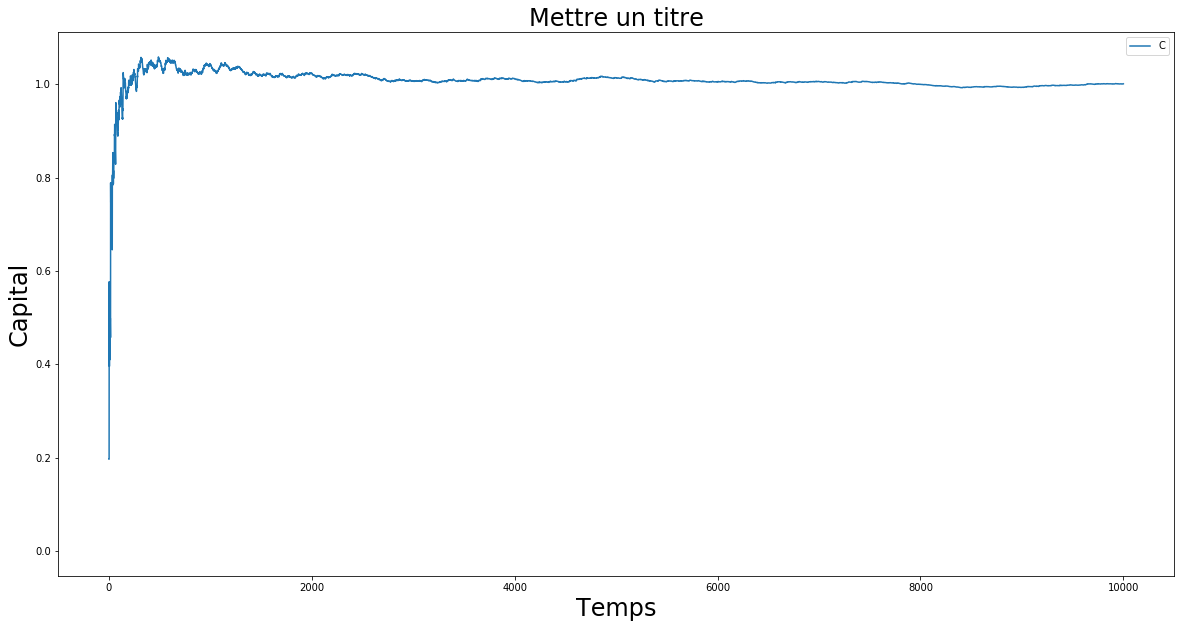

In [77]:
def R_v1(temps,mu, lam):
    R = []
    R.append(0)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi

    Abs = []
    Abs.append(0) #le temps commence a 0
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    
    
    
    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(lam,1))
        X.append(X[i])
        Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
        Abs.append(T[i])
        
        i = i + 1
        
        
    Abs.append(T[i])
    X.append(X[i])
    
    
    
    S = []
    S.append(0)
    
    z=np.linspace(0,temps,temps) # je divise mon axe des abcisses 
    ind=0
    k=0
    R = 0; 
    nt = 0 #nombre de sinistre 
    while (z[k] < temps ) : # tant que je n'ai pas le temps fixé 
    
        if T[ind] < z[k]:
            #print(nt) # si mon T1
            nt = nt + 1
            #on compte le nombre de sinistre
            R = R + X[nt]
            S.append(R/z[k])  #on fait la somme des X jusqu'au nombre de sinistre qu'on divise par la variable t
            ind = ind + 1
        else :
            R = R + X[ind]
            S.append(R/z[k])
        k = k + 1
        
    plt.plot(z,S)
    
    plt.xlabel("Temps", fontsize = 24)
    plt.ylabel("Capital", fontsize = 24)
    plt.title("Mettre un titre", fontsize = 24)
    plt.legend("Ct/t")
    
    
    plt.show()
    
R_v1(10000,1,1)

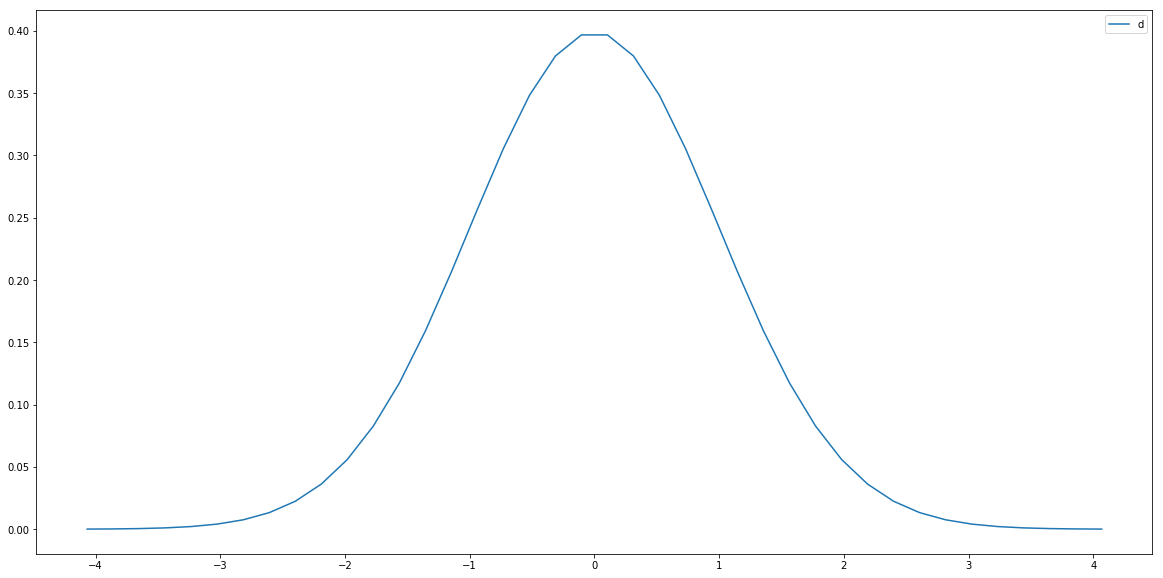

In [32]:
def Normale(temps,mu, lam,n):
    R = []
    R.append(0)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi

    Abs = []
    Abs.append(0) #le temps commence a 0
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    
    
    
    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(lam,1))
        X.append(X[i])
        Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
        Abs.append(T[i])
        
        i = i + 1
        
        
    Abs.append(T[i])
    X.append(X[i])
    
    
    S = []
    S.append(0)
    
    z=np.linspace(0,temps,temps)# je divise mon axe des abcisses
    ind=0
    k=1
    R = 0; 
    nt = 0 #nombre de sinistre 
    i=0   
    while (z[k] < temps ) : # tant que je n'ai pas le temps fixé 
        if T[ind] < z[k]:
           
            nt = nt + 1            #on compte le nombre de sinistre
            R = R + X[nt]
            S.append(sqrt(z[k])*((R/z[k]) - (mu*lam)))  #on fait la somme des X jusqu'au nombre de sinistre qu'on divise par la variable t
            ind = ind + 1
        else :
            R = R + X[ind]
            S.append(sqrt(z[k])*((R/z[k]) - (mu*lam)))
        k = k + 1
    R = R + X[nt]
    S.append(sqrt(z[k])*((R/z[k]) - (mu*lam)))
    m = max(np.abs(S))
    x=np.linspace(-m,m,n)
    y = sps.norm.pdf(x)
    plt.plot(x,y)
    #plt.hist(S,bins=n,normed=1,label="data") partie à travailler en groupe et présenter au prof pour la prochaine séance 
    plt.legend('data')
    #plt.xlabel('T')
    #plt.ylabel('X')
    #plt.plot(z,S)
    
    
Normale(1000,1,1,40)

___________________________________________________________________________________________________________________________

# Question 2

Cette fonction permet de visualiser le graphe du nombre de ruine en fonction de lambda. 
Fonction construite de telle sorte que l'on voit la converge de la probabilité de ruine lorsque lam * mu > rec

In [87]:
def graph_1(tours,n,cap, temps, rec, mu,lam, pas):

    list_ruine = [] #nombre de ruines # ordonnée
    lambd = [] #Abscisse les lam utilisés pour les simulations
    N = []
    
    X = ruine(n,cap,temps,rec,mu,lam)
    nb_ruine = X[1]/n
    lam = X[3]
    list_ruine.append(nb_ruine)
    lambd.append(lam)
    N.append(1)
    
    for i in range(tours):
        lam = lam + pas

        X = ruine(n,cap,temps,rec,mu,lam)
        nb_ruine = X[1]/n
        lam = X[3]
        
        list_ruine.append(nb_ruine)
        lambd.append(lam)
        N.append(1)
    
    
    plt.plot(lambd,list_ruine)
    plt.plot(lambd,N)
    
    plt.xlabel("Valeur de lambda", fontsize = 24)
    plt.ylabel("Probabilité de ruine", fontsize = 24)
    plt.title("Evolution de la probabilité de ruine en fonction de lambda", fontsize = 24)
    plt.legend("λ")
    plt.show()

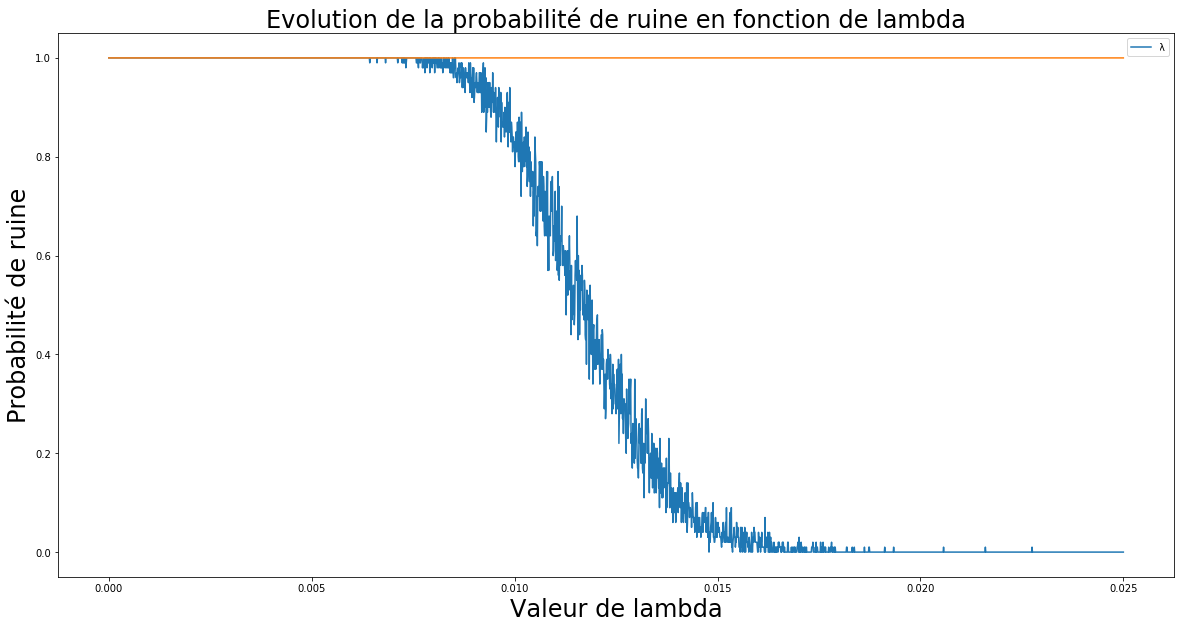

In [88]:
graph_1(2500,100,1000,100,80,1,0.0000001,0.00001)

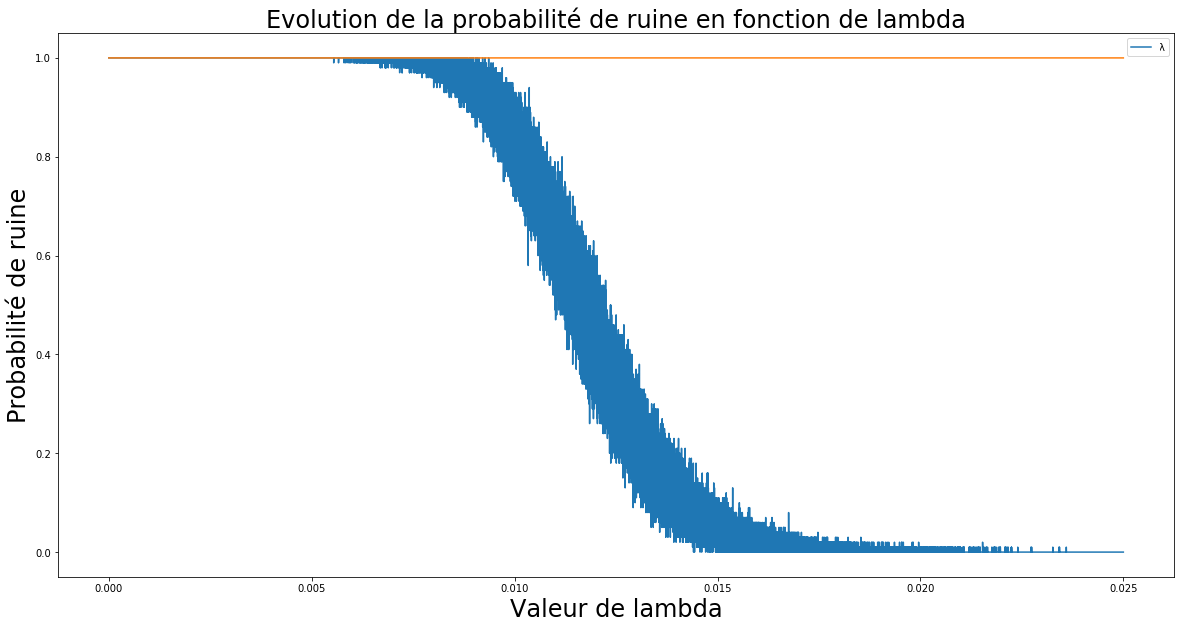

In [90]:
graph_1(250000,100,1000,100,80,1,0.0000001,0.0000001)

_________________________________________________________________________________________________________________________

_________________________________________________________________________________________________________________________

On regarde la variance de l'estimateur de proba, en fonction du nombre de simulations.

In [ ]:
def estimateur_graphe(n,cap, temps, rec, mu,lam):
    list_ruine = []
    Abs = [] 

    
    for i in range(1,n):
        X = ruine(i,cap,temps,rec,mu,lam)
        nb_ruine = (X[1])/i
        
        list_ruine.append(nb_ruine)
        Abs.append(i)
    
    axes=plt.gca()
    axes.set_ylim(0,1.05)
    plt.plot(Abs,list_ruine)
    plt.xlabel("Nombre de simulation", fontsize = 24)
    plt.ylabel("Probabilité de ruine", fontsize = 24)
    plt.title("Evolution de la probabilité de ruine en fonction du nombre de simulations", fontsize = 24)
    #plt.legend("")
    plt.show()


In [ ]:
estimateur_graphe(1000,1000,10,80,1,0.005)

In [ ]:
estimateur_graphe(1000,1000,10,80,1,0.0005)

_________________________________________________________________________________________________________________________

_________________________________________________________________________________________________________________________

Regardons l'effet de l'horizon en fonction du nombre d'expériences. <br>
On fixe n <br>
On fait varier temps l'autre variable  
On regarde l'évolution du nombre de faillites.
ICI, on prend n = 100  
temps -> temps de départ qui augmente de pas à chaque tour, jsuqu'à horizon.  

In [ ]:
def horizon(horizon, n,cap, temps, rec, mu,lam,pas):

    list_ruine = [] #nombre de ruines # ordonnée
    TMP = [] #Abscisse les temps utilisés pour les simulations

    X = ruine(n,cap,temps,rec,mu,lam)
    nb_ruine = X[1]/n
    lam = X[3]
    list_ruine.append(nb_ruine)
    TMP.append(temps)
    
    for i in range(horizon):
        temps = temps + pas

        X = ruine(n,cap,temps,rec,mu,lam)
        nb_ruine = X[1]/n
        lam = X[3]
        
        list_ruine.append(nb_ruine)
        TMP.append(temps)
    
    
    plt.plot(TMP,list_ruine)
    plt.xlabel("Valeur de l'horizon", fontsize = 24)
    plt.ylabel("Probabilité de ruine", fontsize = 24)
    plt.title("Evolution de la probabilité de ruine en fonction de l'horizon", fontsize = 24)
    #plt.legend("")
    plt.show()



In [ ]:
horizon(1000,100,1000,2,80,1,0.08,1)

In [ ]:
horizon(80,100,1000,2,80,1,0.005,1)


In [ ]:
horizon(1000,100,1000,2,80,1,0.08,1)

In [ ]:
horizon(10000,100,1000,2,80,1,0.08,10)

Cette fois-ci, on garde la même simulation tout le long et on regarde si il y a un échec ou non. 

In [146]:
def une_ruine(cap, temps, rec, mu,lam):
    R = []
    R.append(cap)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi
    
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    
    

    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        #t = expovariate(mu)
        t = npr.exponential(mu)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(1/lam))
        R.append(R[indice] + rec*(T[i]-T[i-1]))
        R.append(R[indice+1] - X[i])
        
        if(R[indice + 1] < 0 ):
            return (T[i][0]) #On return l'indice de la faillite.
            
        i = i + 1
        indice = indice + 2
    
    R.append(R[indice] + rec*(T[i]-T[i-1]))
    
    return(temps+1) #on sait qu'il n'y a pas eu de faillite.

In [ ]:
def horizon_meme_simulation(n,cap, horizon, rec, mu,lam):
    ind_ruine = []
    Ord = []
    
    for k in range(n):
        x = une_ruine(cap, horizon, rec, mu,lam)
        ind_ruine.append( x )
    
    #Dans le vecteur ind_ruine, on a n simulations. -1 si il n'y a pas eu faillite, et l'indice de la 
    #faillite dans le cas contraire. 
   
    ind = np.sort(ind_ruine)
   
    somme = 0
    for i in range(n):
        if( ind[i] > horizon ):
            Ord.append(somme)
        else :
            somme = somme + 1/n
            Ord.append(somme)
        
    m = len(ind)
    k = 0
    while(k<m):
        if(ind[k] > horizon):
            ind[k] = horizon
        k = k+1
    
    Ord.append(0)
    Ord.append(0)
    ind = np.append(ind,0)
    ind = np.append(ind,ind[1])
    ind = np.append(ind, horizon)
    Ord.append(somme)
    ind= np.sort(ind)
    Ord = np.sort(Ord)
    
    #print(len(ind),len(Ord))
    #print(ind)
    #print(Ord)
    
    axes=plt.gca()
    axes.set_ylim(-0.05,1.05)
    axes.set_xlim(-0.05,horizon + 1)
    plt.step(ind,Ord)
    plt.xlabel("valeur de l'horizon", fontsize = 24)
    plt.ylabel("Probabilité de ruine", fontsize = 24)
    plt.title("Evolution de la probabilité de ruine en fonction de l'horizon", fontsize = 24)
    #plt.legend("")
    plt.show()

In [ ]:
horizon_meme_simulation(10,1000,40,80,1,0.05)
horizon_meme_simulation(10,1000,40,80,1,0.005)

____________________________________________________________________________________________________________________________


_________________________________________________________________________________________________________________________

# Question 3

Dans cette question, on va utiliser un taux de rendement instantané r. Pour que notre étude soit relativement proche de la réalité, nous allons utiliser un taux de rendement de 1.9%. C'est celui utilisé par axa pour leur assurance vie

In [46]:
r = 0.0013 #taux de rendement

Commencons par tracer des trajectoires

In [47]:
def trajectoire_taux_rendement(cap, temps, mu, lam):
    Capital = []
    Capital.append(cap)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi

    Abs = []
    Abs.append(0) #le temps commence a 0
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    
    
    
    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(1/lam,1)
                )
        e = np.exp(r*(T[i]-T[i-1]))
        Capital.append( Capital[indice]*e  )
        Capital.append(Capital[indice+1] - X[i])
        
        Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
        Abs.append(T[i])
        
        i = i + 1
        indice = indice + 2
        
    Abs.append(T[i])
    e = np.exp(r*(T[i]-T[i-1]))
    Capital.append(Capital[indice]*e)
    
    plt.plot(Abs,Capital)
    plt.xlabel("temps")
    plt.ylabel("capital")
    plt.show()

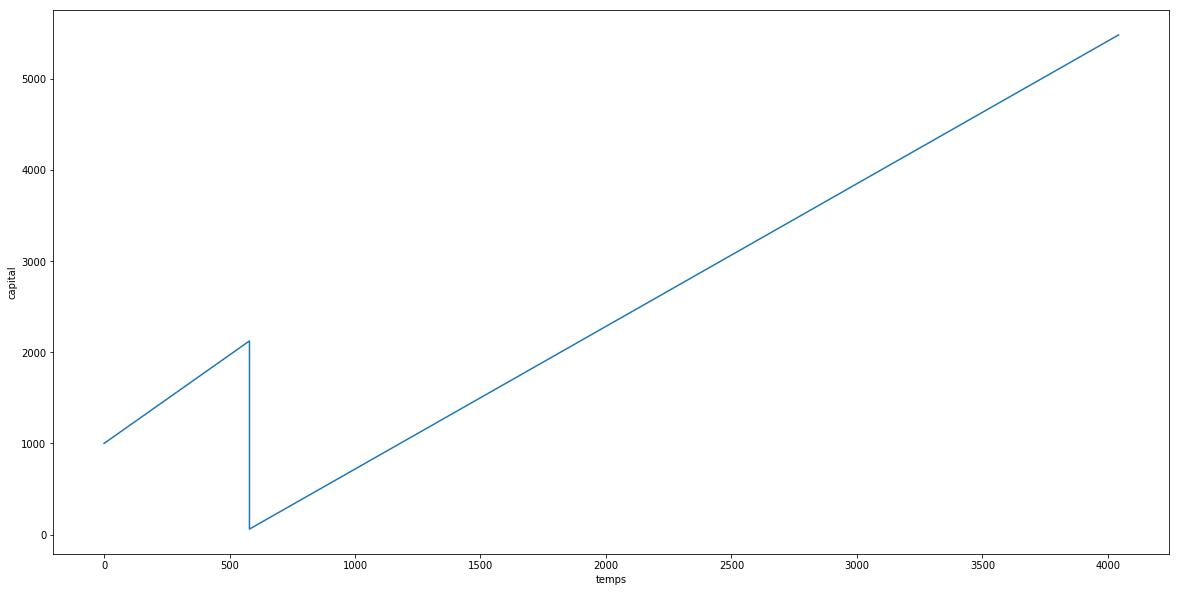

In [61]:
trajectoire_taux_rendement(1000, 1000, 1000, 0.0005)